<p><center><h1><b>Analysis of Air Quality Index in Mexico City Metropolitan Area (CDMX) from 2019 to 2023</b></h1></center></p>

<br><p><h4> <b>Introduction</b> </h4></p>

This project focuses on the analysis of air quality index (AQI) data for the Mexico City Metropolitan Area (CDMX) spanning from 2019 to 2023. The data is sourced from the Secretaría del Medio Ambiente (SEDEMA), which provides hourly AQI readings by zone and atmospheric pollutant, as per the environmental standard NADF-009-AIRE-2017. Data is provided in several CSV files named 'indice_20XX' where 'XX' stands for each year data.

While the validity of this AQI index ended in 2020 with the implementation of the Official Mexican Standard NOM-172-SEMARNAT-2019, which introduced national-level guidelines for AQI calculation, it continued to be published for a reasonable period as the population transitioned to the new index.

<br><p><h4> <b>Dataset Overview and Dimensions of Variability</b> </h4></p>

1. What is the variable of this database?

The primary variable in this database is the **Air Quality Index (AQI)** for different pollutants. The dataset contains **hourly** measurements of AQI values for various atmospheric **contaminants**.

2. Identify what the dimensions of variability are in this database.
    - **Contaminants:** The dataset includes AQI measurements for **6** different pollutants: Ozone (O3), Sulfur Dioxide (SO2), Nitrogen Dioxide (NO2), Carbon Monoxide (CO), PM10 (particulate matter with a diameter of 10 micrometers or less), and PM2.5 (particulate matter with a diameter of 2.5 micrometers or less).
    - **Locations:** The measurements are taken across **5** regions: Noroeste (Northwest), Noreste (Northeast), Centro (Center), Suroeste (Southwest), and Sureste (Southeast).
    - **Time:** The dataset includes hourly AQI readings spanning **from 2019 to 2023**, with each entry corresponding to a specific date and hour.


<br><p><h4> <b>Ozono Centro Region Time Series</b> </h4></p>

Select the 'Ozono Centro' variable. Make a line graph for this time series.

In [11]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [12]:
# Load data from CSV files for the years 2019 to 2022. 
# Skip the first 8 rows to bypass the metadata and load the actual data.
data19 = pd.read_csv('indice_2019.csv', encoding='latin1', skiprows=8)
data20 = pd.read_csv('indice_2020.csv', encoding='latin1', skiprows=8)
data21 = pd.read_csv('indice_2021.csv', encoding='latin1', skiprows=8)
data22 = pd.read_csv('indice_2022.csv', encoding='latin1', skiprows=8)

# Concatenate the data from all four years into a single DataFrame.
data = pd.concat([data19, data20, data21, data22], ignore_index=True)

# Delete the individual yearly DataFrames to free up memory.
del data19, data20, data21, data22

# Create a datetime column by combining the 'Fecha' and 'Hora' columns.
# Adjust the 'Hora' column to be zero-indexed and format it appropriately.
data['Fecha y Hora'] = pd.to_datetime(
    data['Fecha'] + '-' + np.mod(data['Hora'] - 1, 24).astype(str) + ':00:00', 
    format='%d/%m/%Y-%H:%M:%S'
)

# Display the first few rows of the combined DataFrame to verify the data.
data.head()

Fecha  Hora  Noroeste ozono  Noroeste dióxido de azufre  \
0  01/01/2019     1             NaN                         5.0   
1  01/01/2019     2             NaN                         6.0   
2  01/01/2019     3             NaN                         6.0   
3  01/01/2019     4             6.0                         6.0   
4  01/01/2019     5             7.0                         6.0   

   Noroeste dióxido de nitrógeno  Noroeste monóxido de carbono  Noroeste PM10  \
0                            NaN                          10.0           64.0   
1                            NaN                          11.0           70.0   
2                            NaN                           NaN           77.0   
3                           17.0                           NaN           91.0   
4                           16.0                           NaN          101.0   

   Noroeste PM25  Noreste ozono  Noreste dióxido de azufre  ...  \
0           74.0            NaN                         12  ...   
1           79.0            NaN                         12  ...   
2           85.0            NaN                         13  ...   
3           93.0            7.0                         13  ...   
4          103.0            6.0                         13  ...   

   Suroeste monóxido de carbono  Suroeste PM10  Suroeste PM25  Sureste ozono  \
0                           9.0           38.0           59.0            NaN   
1                          10.0           43.0           63.0            NaN   
2                           NaN           51.0           67.0            NaN   
3                           NaN           61.0           73.0            8.0   
4                           NaN           70.0           78.0            9.0   

   Sureste dióxido de azufre  Sureste dióxido de nitrógeno  \
0                        5.0                           NaN   
1                        5.0                           NaN   
2                        5.0                           NaN   
3                        5.0                          16.0   
4                        6.0                          16.0   

   Sureste monóxido de carbono  Sureste PM10  Sureste PM25        Fecha y Hora  
0                          9.0          52.0          65.0 2019-01-01 00:00:00  
1                         11.0          60.0          71.0 2019-01-01 01:00:00  
2                          NaN          77.0          77.0 2019-01-01 02:00:00  
3                          NaN          96.0          87.0 2019-01-01 03:00:00  
4                          NaN         103.0         100.0 2019-01-01 04:00:00  

[5 rows x 33 columns]

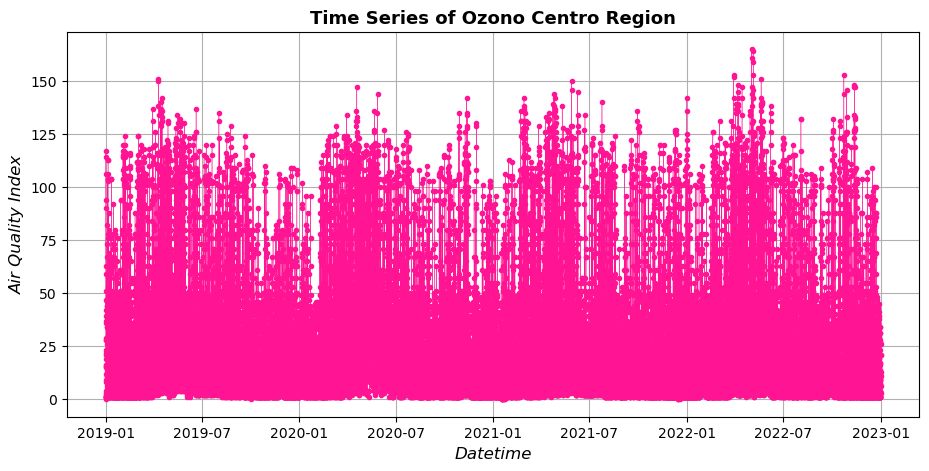

In [24]:
# Plot the time series as a line graph
plt.figure(figsize=(11, 5))  
plt.plot(data['Fecha y Hora'], data['Centro ozono'], marker='.', color='deeppink', linewidth=0.3) 
plt.title('Time Series of Ozono Centro Region', fontweight='bold', fontsize=12)
plt.xlabel('Datetime', fontstyle='italic', fontsize=12) 
plt.ylabel('Air Quality Index', fontstyle='italic', fontsize=12)
plt.grid(True)  
plt.show() 

<br><p><h4> <b>Ozone Index Across Different Regions</b> </h4></p>

In a single graph, iterate and plot (with different colors) the ozone index for different locations. Include legends in your graph so we know what each line means.

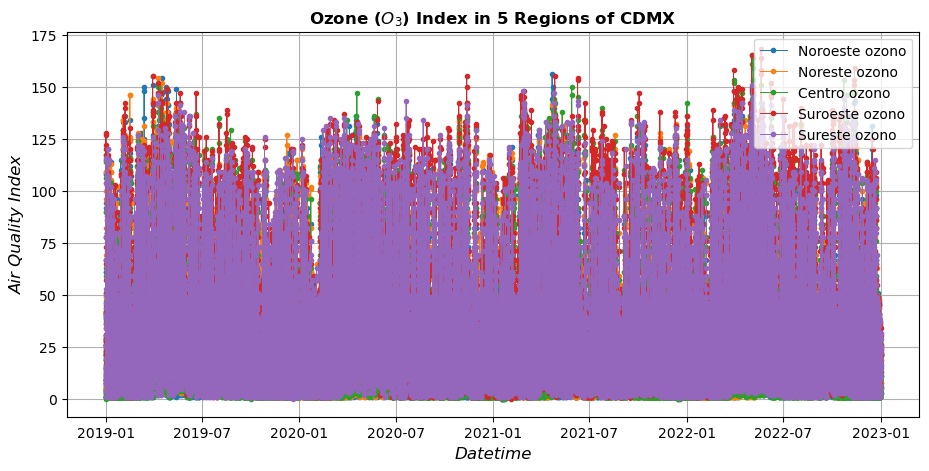

In [26]:
# Extract data columns names and define indexes for the ozone data
columns = data.columns
O3_indexes = np.arange(2, 32, 6)  # Indexes of columns containing ozone data

# Create a figure to plot the ozone index for different locations
plt.figure(figsize=(11, 5))

# Iterate through the ozone index columns and plot each one with a different color
for i in O3_indexes:
    plt.plot(data['Fecha y Hora'], data.iloc[:, i], marker='.', label=columns[i], linewidth=0.7)

# Set the plot labels and legends
plt.xlabel('Datetime', fontstyle='italic', fontsize=12)
plt.ylabel('Air Quality Index', fontstyle='italic', fontsize=12)
plt.title('Ozone ($O_3$) Index in 5 Regions of CDMX', fontweight='bold', fontsize=12)
plt.legend(loc=0)
plt.grid(True)

# Display the plot
plt.show()

<br><p><h4> <b>AQI for Various Contaminants and Regions</b> </h4></p>

Now generate a multi-panel graph, where in each panel you have a different pollutant, and the lines for the regions.

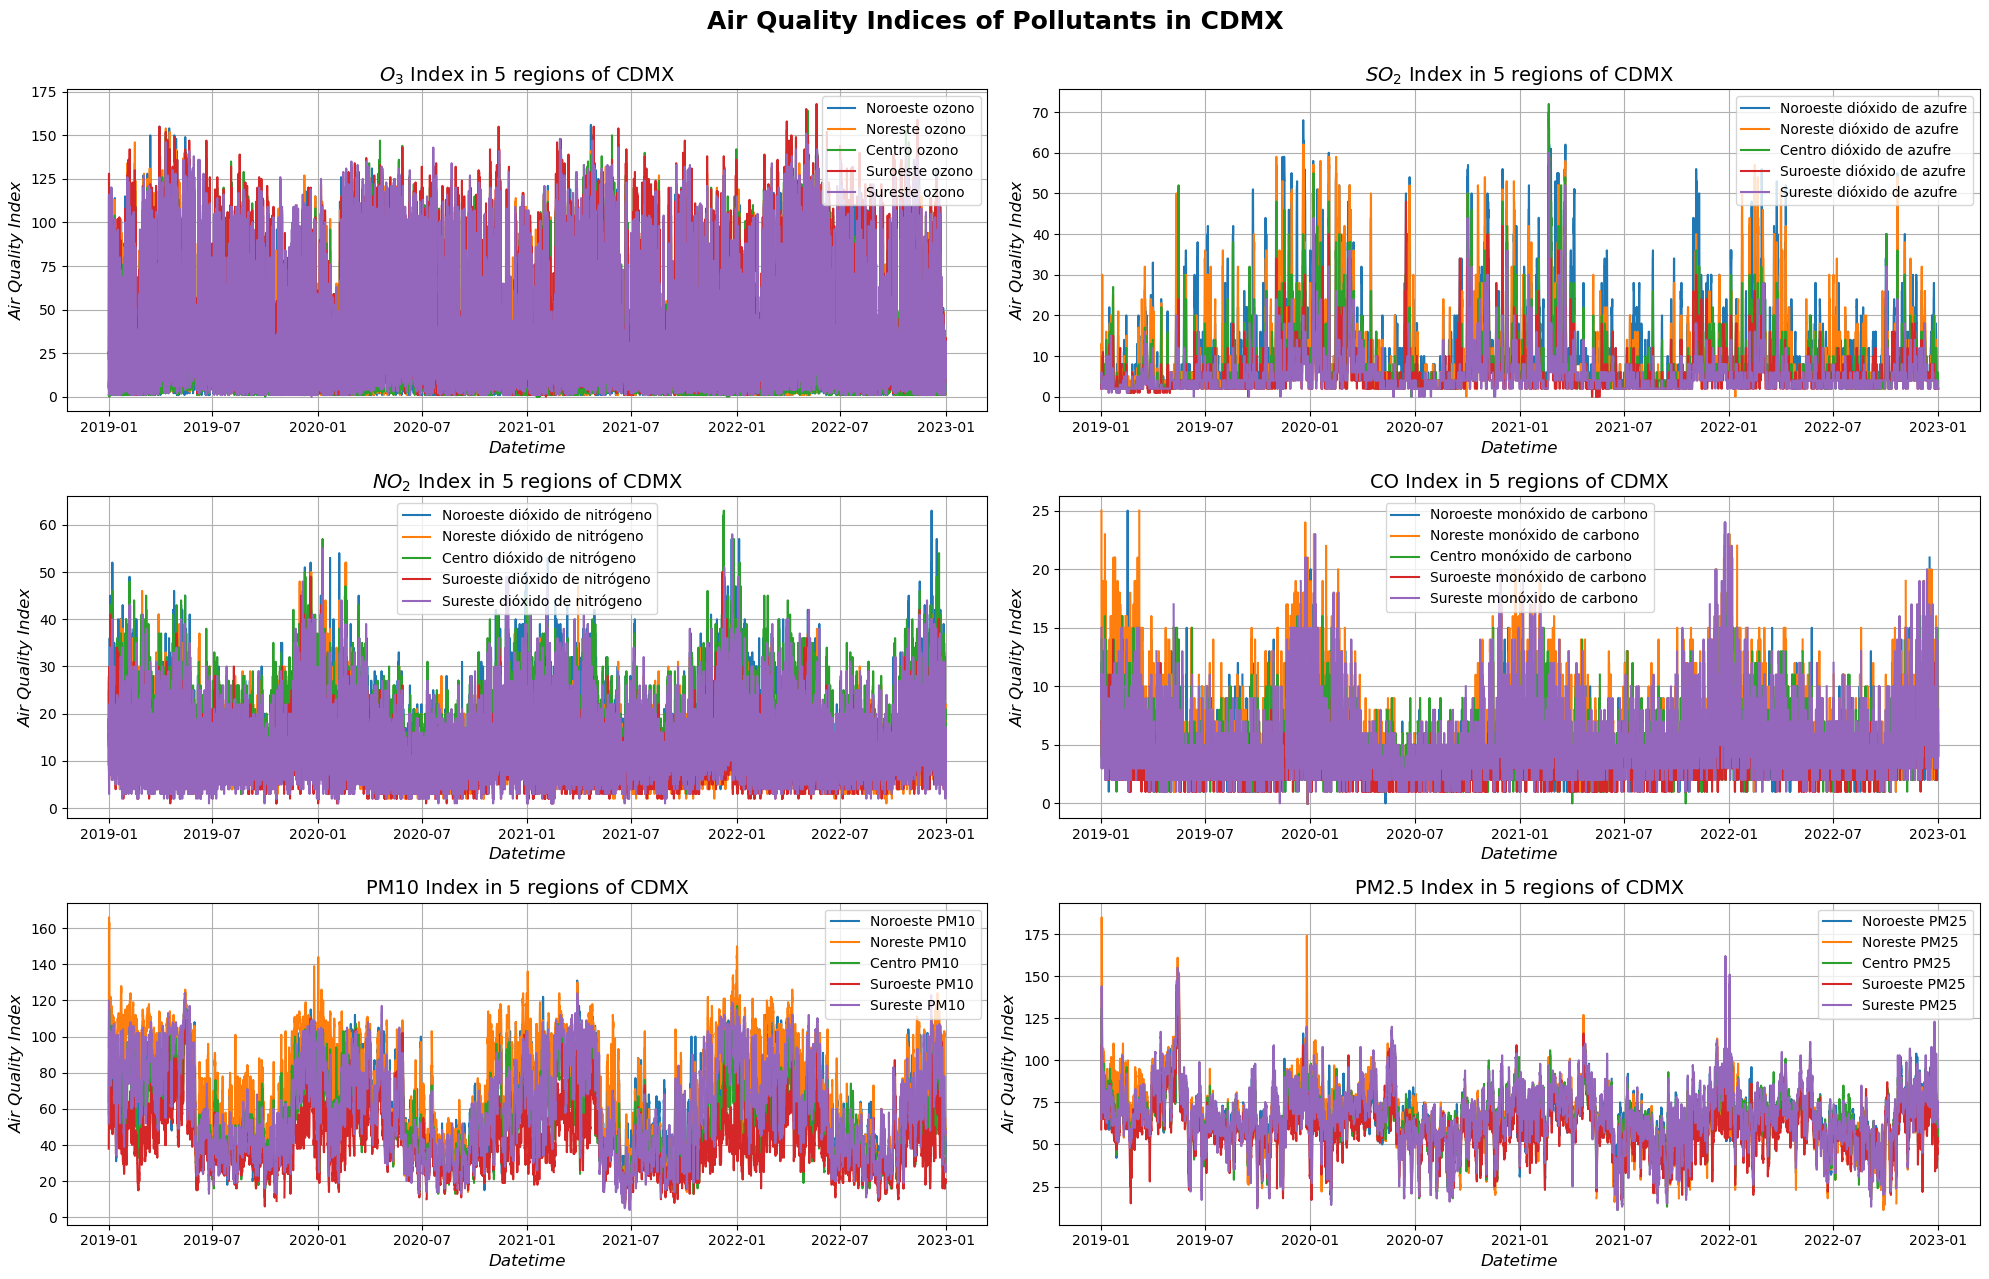

In [15]:
# Define labels for each subplot
labels = ['$O_3$', '$SO_2$', '$NO_2$', 'CO', 'PM10', 'PM2.5']

# Create figure and axes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 13))

# Iterate over the axes and plot the data for each pollutant
for i, ax in enumerate(axes.flat):
    # Calculate the indices for the current pollutant
    pollutant_idx = np.arange(2 + i, 32, 6)
    
    # Plot the data for the current pollutant and set the labels
    ax.plot(data['Fecha y Hora'],data.iloc[:,pollutant_idx], label=columns[pollutant_idx])
    ax.set_xlabel('Datetime', fontstyle='italic', fontsize=12)
    ax.set_ylabel('Air Quality Index', fontstyle='italic', fontsize=12)
        
    # Add legend and title
    ax.set_title(f'{labels[i]} Index in 5 regions of CDMX', fontsize=14)
    ax.grid(True)
    ax.legend(loc=0)
    
# Add a suptitle for the entire figure
plt.suptitle('Air Quality Indices of Pollutants in CDMX', fontsize=18, fontweight='bold')

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

<br><p><h4> <b>Data Imputation and Moving Averages for Ozone in Southeast CDMX</b> </h4></p>

Let's take O3 in the southeast of the city. Fill in missing data with linear interpolation. Program a 7-day moving average and apply it to the time series. Use a uniform kernel and a triangular one. Show the results.

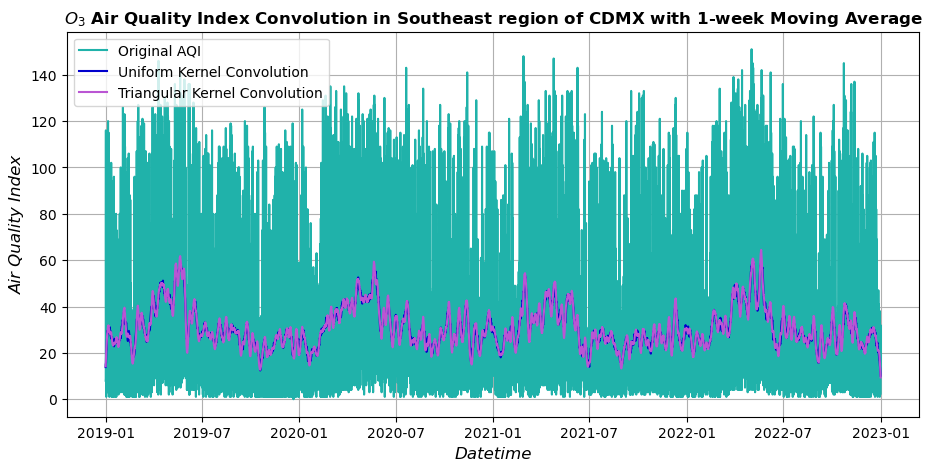

In [27]:
# Variable of interest (U component) interpolated to fill missing values
SE_O3 = data['Sureste ozono'].interpolate()

# Trim the array to exclude leading and trailing NaNs
first_idx = SE_O3.first_valid_index()
last_idx = SE_O3.last_valid_index()
SE_O3_trim = SE_O3.loc[first_idx : last_idx]

# Define the number of hours in one week (7 days * 24 hours/day + 1 for odd number)
n_elem = 7*24 + 1

# V component of the convolution (uniform kernel for a one-week moving average)
v_uniform = np.ones(n_elem) / n_elem

# Initialize the convolution result array
convolved_uniform = np.zeros_like(SE_O3_trim)

# Perform the convolution 'manually'
half_window = n_elem // 2
for i in range(len(SE_O3_trim)):
    # Calculate the start and end indices of the window
    start_idx = max(0, i - half_window)
    end_idx = min(len(SE_O3_trim), i + half_window + 1)
    
    # Calculate the corresponding window of v (to handle edge effects)
    v_window = v_uniform[half_window - (i - start_idx):half_window + (end_idx - i)]
    
    # Calculate the convolution for the current point
    convolved_uniform[i] = np.dot(SE_O3_trim[start_idx:end_idx], v_window) 
 
# V component of the convolution (triangular kernel for a one-week moving average)   
x = np.linspace(-1, 1, n_elem)
v_tringular = (1 - np.abs(x)) / (np.sum(1 - np.abs(x)))

# Perform 'computed' convolution
convolved_triangular = np.convolve(SE_O3_trim, v_tringular, mode='same')
    
# Plot the original and convolved data, both uniform and triangular
plt.figure(figsize=(11, 5))
plt.plot(data['Fecha y Hora'][first_idx : last_idx + 1], SE_O3_trim, label='Original AQI', color='lightseagreen')
plt.plot(data['Fecha y Hora'][first_idx : last_idx + 1], convolved_uniform, label='Uniform Kernel Convolution', color = 'mediumblue')
plt.plot(data['Fecha y Hora'][first_idx : last_idx + 1], convolved_triangular, label='Triangular Kernel Convolution', color = 'mediumorchid')
plt.xlabel('Datetime', fontstyle='italic', fontsize='12')
plt.ylabel('Air Quality Index', fontstyle='italic', fontsize='12')
plt.title('$O_3$ Air Quality Index Convolution in Southeast region of CDMX with 1-week Moving Average', fontweight='bold', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

<br><p><h4> <b>Moving Averages for Different Periods</b> </h4></p>

We are going to make moving averages of 15 days, 1 month and 3 months. We will use the np.convolve function and a rectangular kernel.

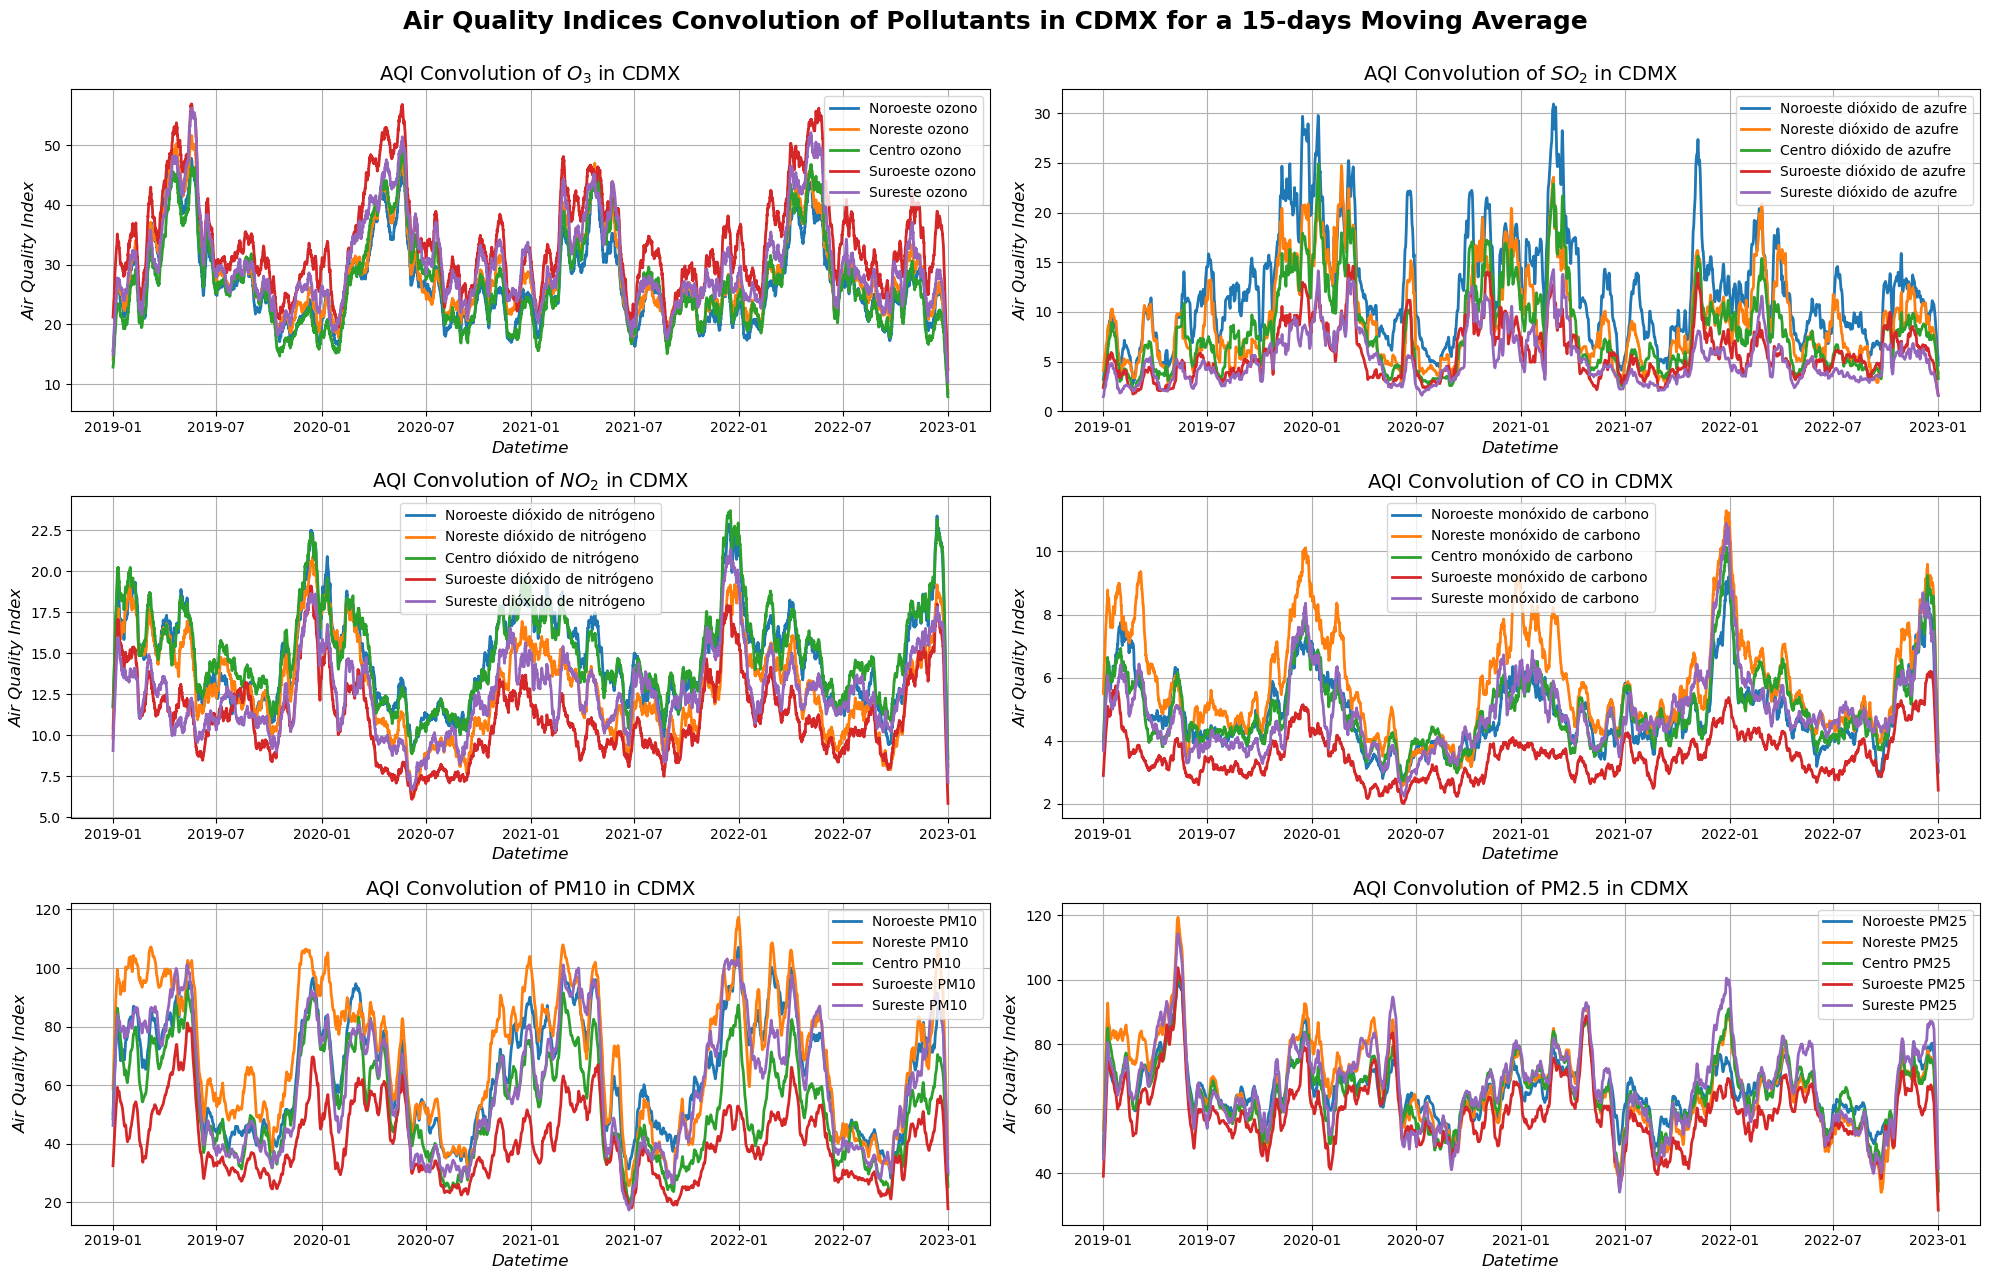

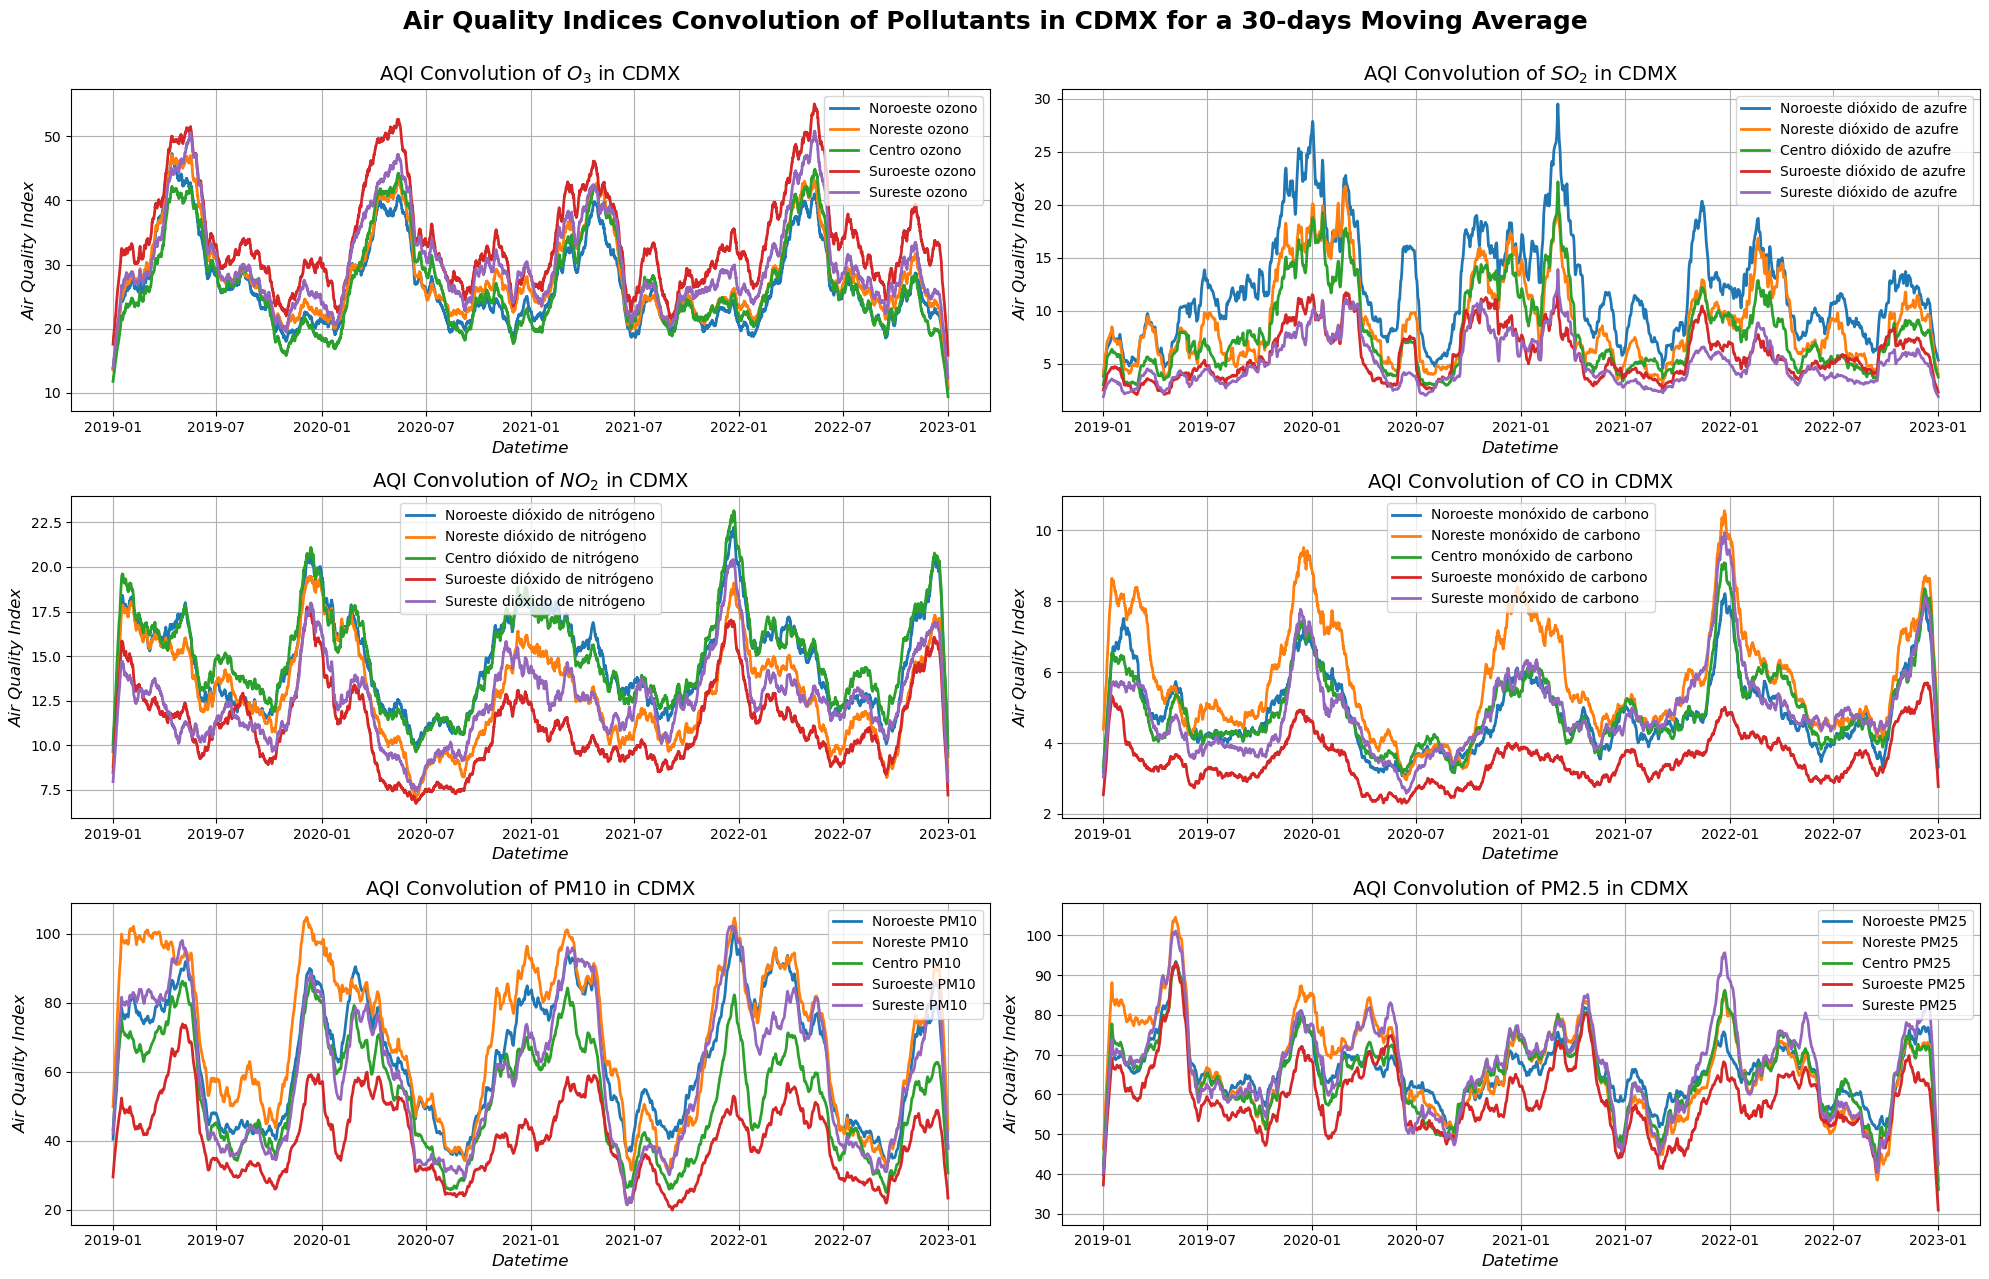

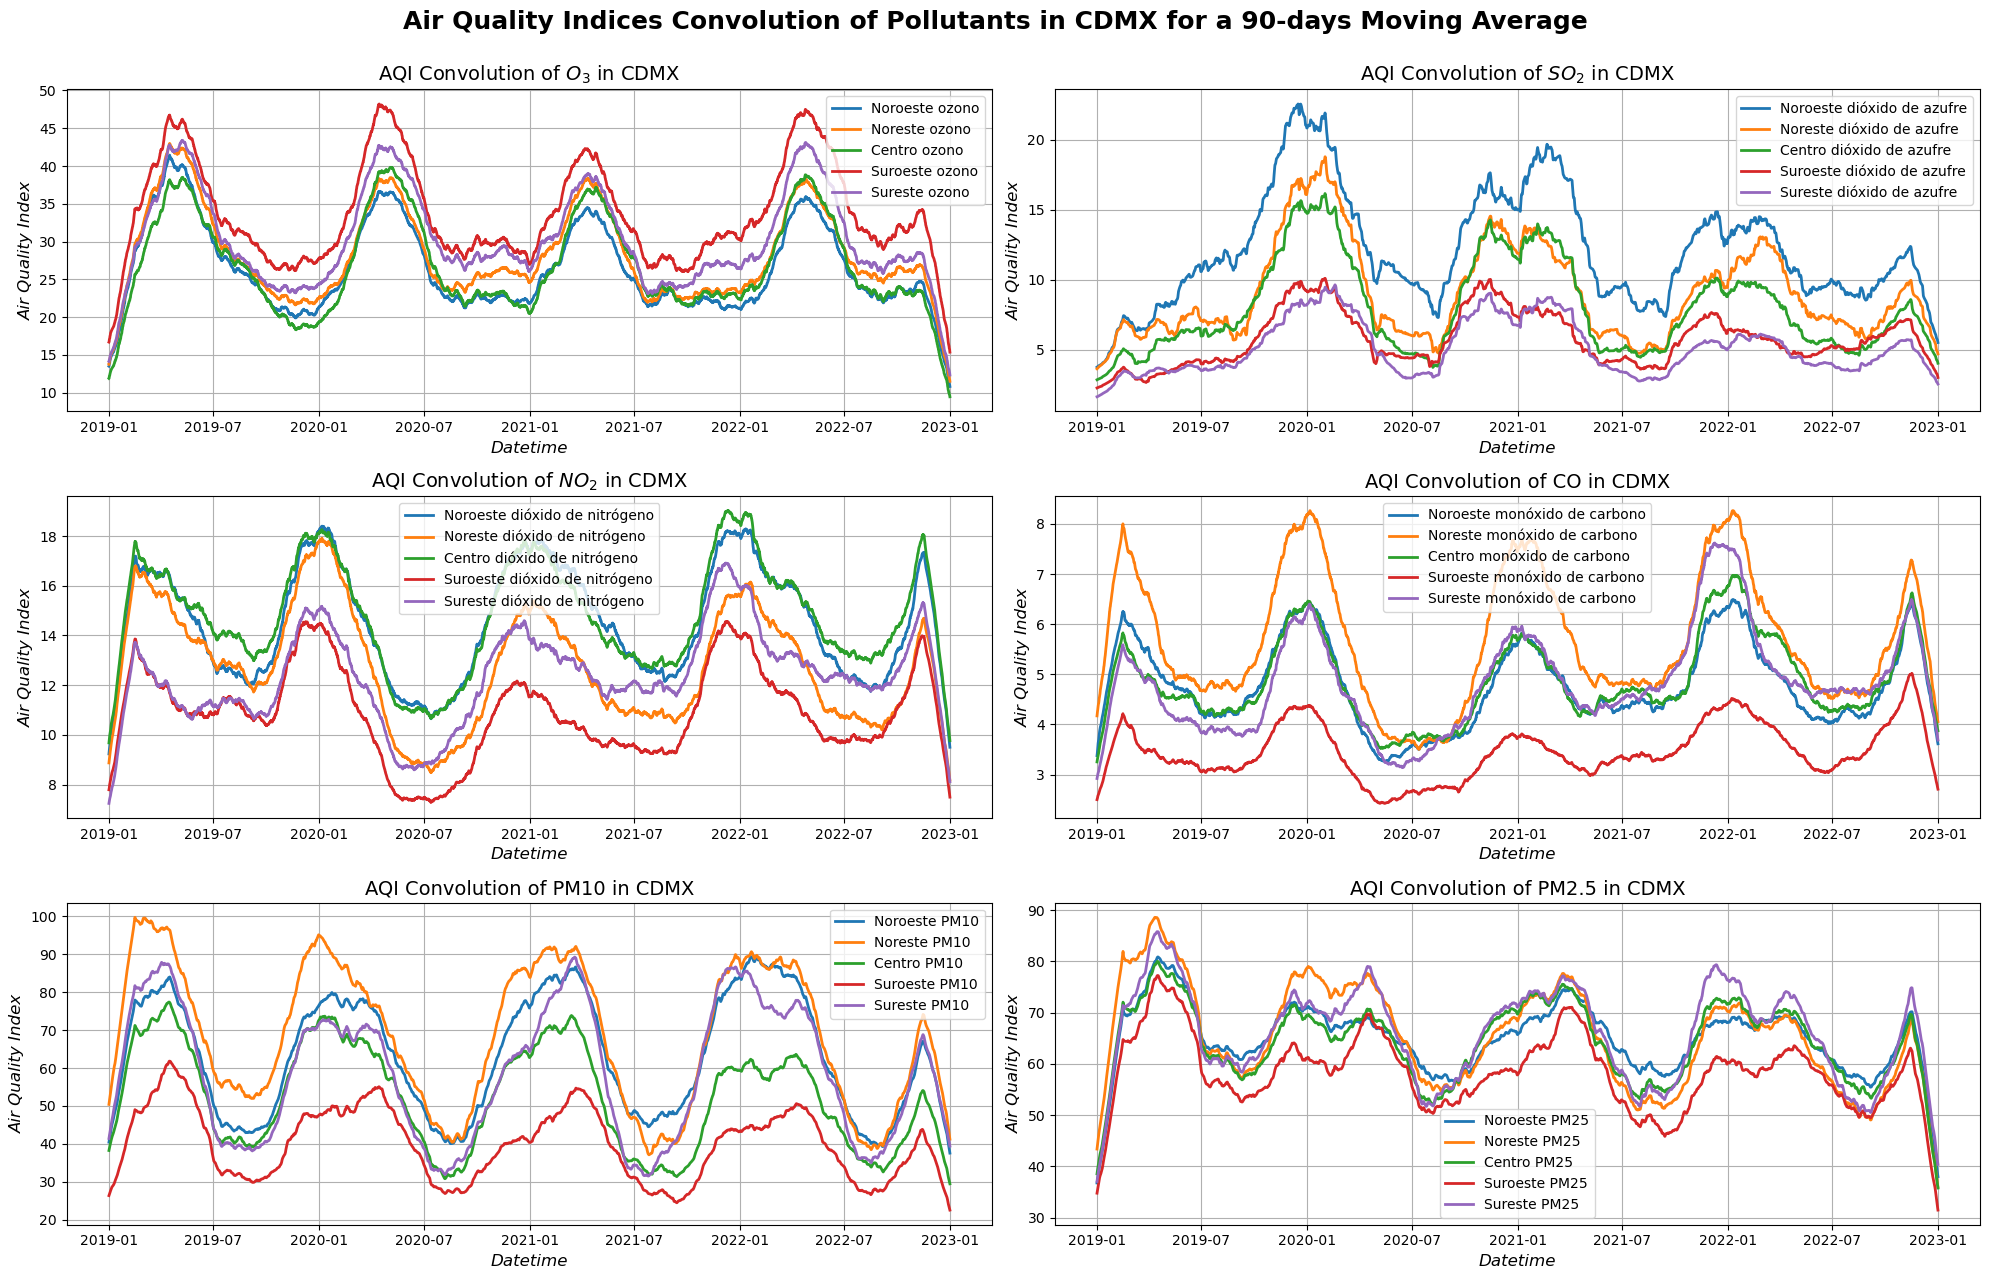

In [17]:
# Function to plot convolutions of pollutant indices
def plot_convolutions(v, n_days):
    # Create figure and axes
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 13))

    # Iterate over the axes and plot the data for each pollutant
    for i, ax in enumerate(axes.flat):
        # Iterate over each region for the current contaminant
        for j in range(5):
            # Calculate the index for the current pollutant and region
            idx = 2 + i + j * 6
            
            # Define the contaminant column and interpolate to fill missing values
            contaminant = data[columns[idx]].interpolate()
            
            # Trim the array to exclude leading and trailing NaNs
            first_idx = contaminant.first_valid_index()
            last_idx = contaminant.last_valid_index()
            trimmed_contaminant = contaminant.loc[first_idx : last_idx]
            
            # Perform the convolution
            convolved = np.convolve(trimmed_contaminant, v, mode='same')
            
            # Plot the convolution result for the current region
            ax.plot(data['Fecha y Hora'][first_idx : last_idx + 1], convolved, label=columns[idx], linewidth=2)
        
        # Set the labels and title for the current subplot
        ax.set_xlabel('Datetime', fontstyle='italic', fontsize=12)
        ax.set_ylabel('Air Quality Index', fontstyle='italic', fontsize=12)
        ax.set_title(f'AQI Convolution of {labels[i]} in CDMX', fontsize=14)
        ax.legend(loc=0)
        ax.grid(True)

    # Add a suptitle for the entire figure
    plt.suptitle(f'Air Quality Indices Convolution of Pollutants in CDMX for a {n_days}-days Moving Average', fontsize=18, fontweight='bold')

    # Adjust layout and show the plot
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()
    
# Define the number of days of interest for each moving average
n_days = [15,30,90]

# Iterate and plot each moving average
for n in n_days:
    # V component of the convolution (rectangular kernel for a n-days moving average)
    v = np.ones(n * 24 + 1) / (n * 24 + 1) # n days * 24 hours/day + 1 for odd number
    plot_convolutions(v, n)

<br><p><h4> <b>Generation of 4D Array for Moving Averages</b> </h4></p>

Generate a 4-dimensional array: time, pollutant, zone, moving average length

In [18]:
# Define the number of hours in 15 days, 30 days, and 90 days
n_hours = [n * 24 + 1 for n in n_days]

# Define the convolution kernels for each moving average
kernels = [np.ones(n) / n for n in n_hours]

# Create the 4D array to store the results
# Dimensions: [time, pollutant, zone, moving averages]
data_reshaped = np.zeros((data.iloc[:,0].size, 6, 5, len(kernels)))

# Iterate over each pollutant and zone to apply convolutions
for i in range(6):  # 6 pollutants
    for j in range(5):  # 5 zones
        # Calculate the index for the current pollutant and zone
        idx = 2 + i + j * 6
        
        # Define the contaminant column and interpolate to fill missing values
        contaminant = data[columns[idx]].interpolate()
        
        # Trim the array to exclude leading and trailing NaNs
        first_idx = contaminant.first_valid_index()
        last_idx = contaminant.last_valid_index()
        trimmed_contaminant = contaminant.loc[first_idx : last_idx]
        
        # Perform the convolutions and store results in the 4D array
        for k, kernel in enumerate(kernels):
            convolved = np.convolve(trimmed_contaminant, kernel, mode='same')
            data_reshaped[:, i, j, k] = np.pad(convolved, (first_idx, 35064 - last_idx - 1), 'constant', constant_values=np.nan)

# Resulting array is now populated with moving averages for each combination of time, pollutant, zone, and convolution
print("4D array shape:", data_reshaped.shape)

4D array shape: (35064, 6, 5, 3)


<br><p><h4> <b>4D Array for Different Averaging Periods</b> </h4></p>

Show your results as in the previous figure for the 3 averaging periods (3 new figures).

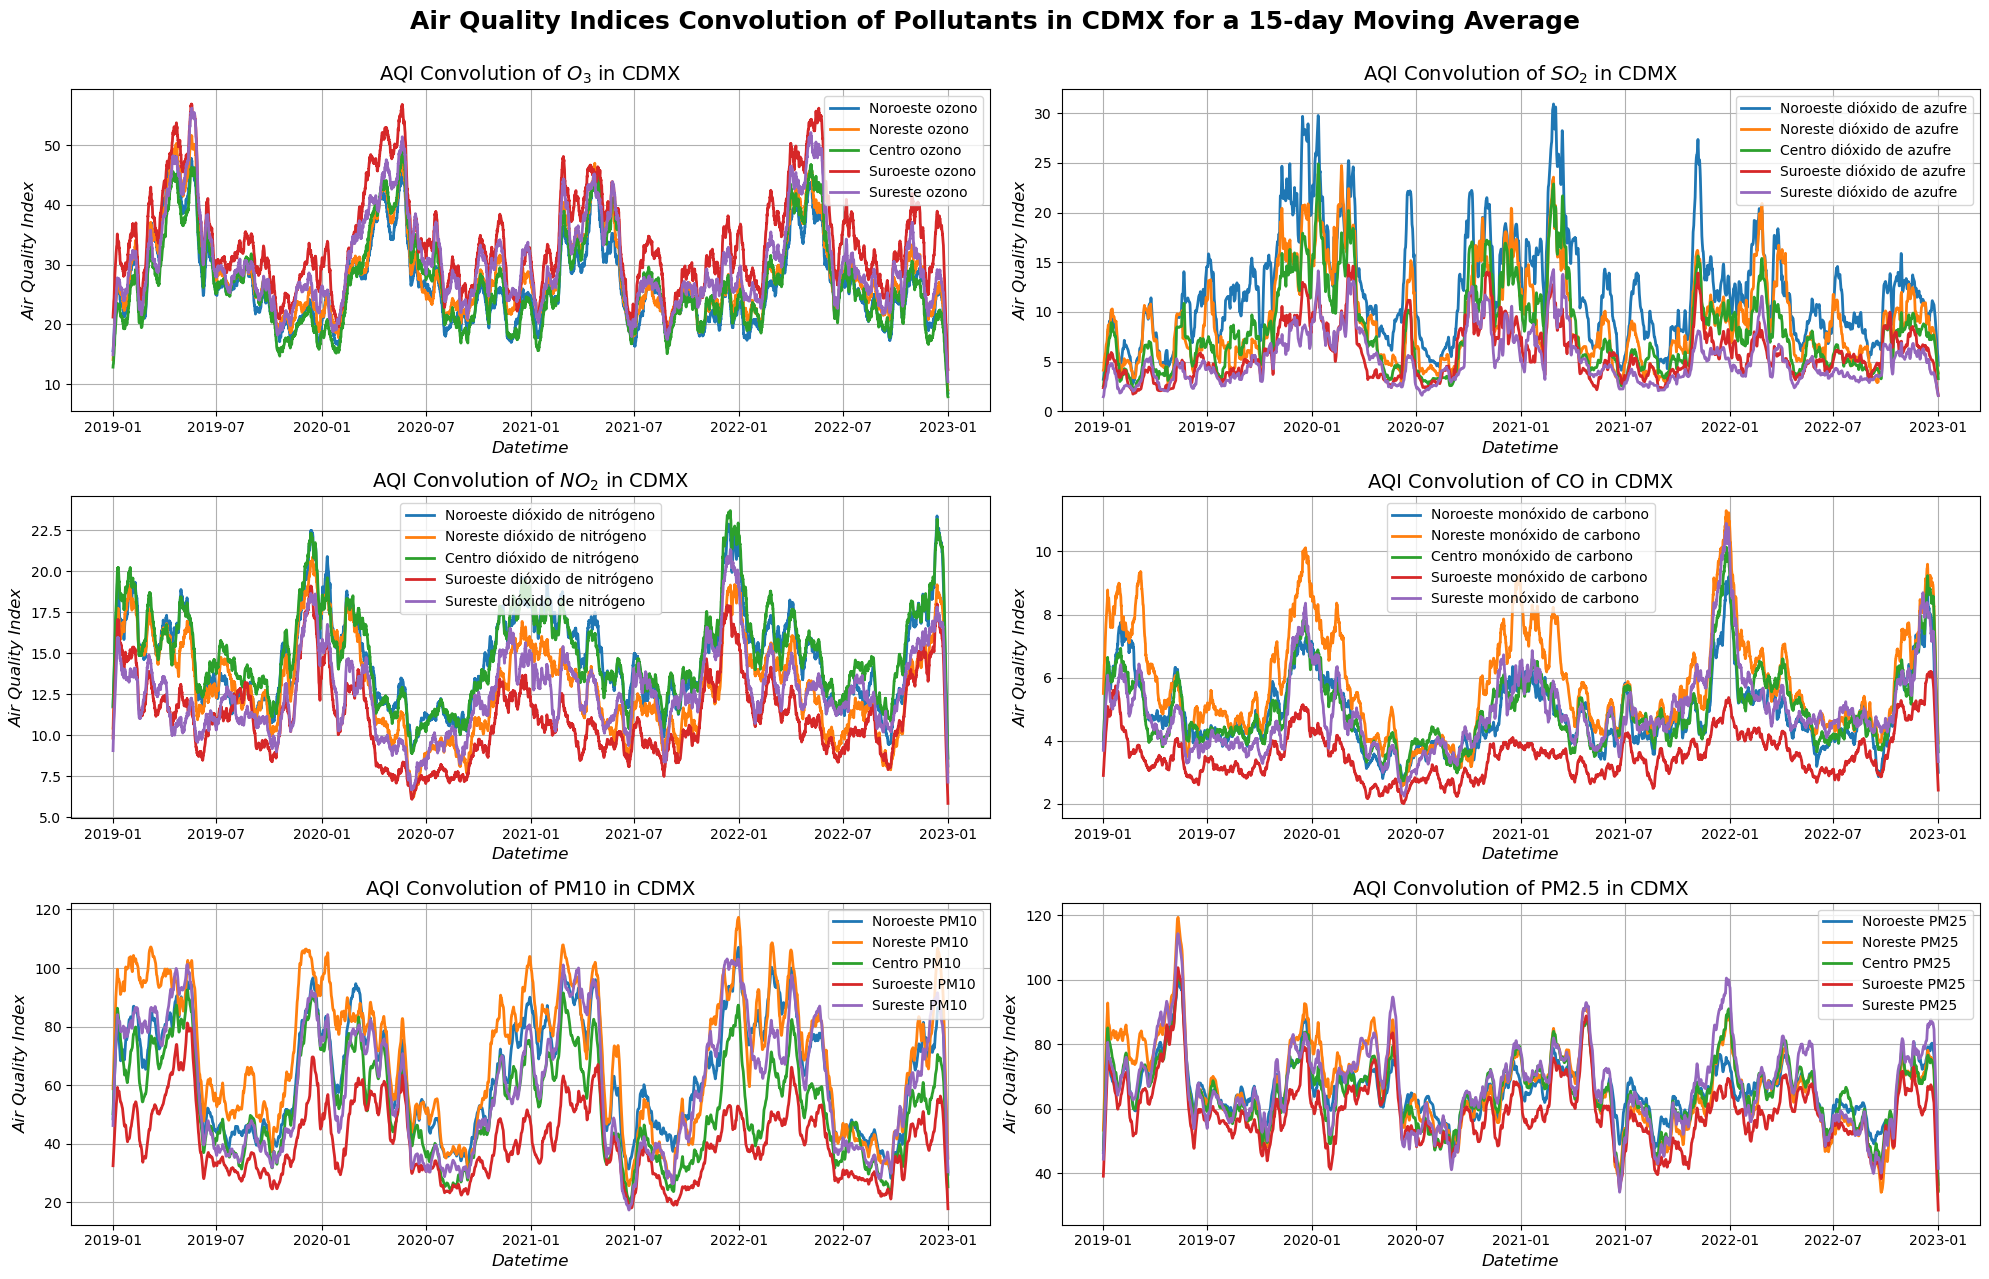

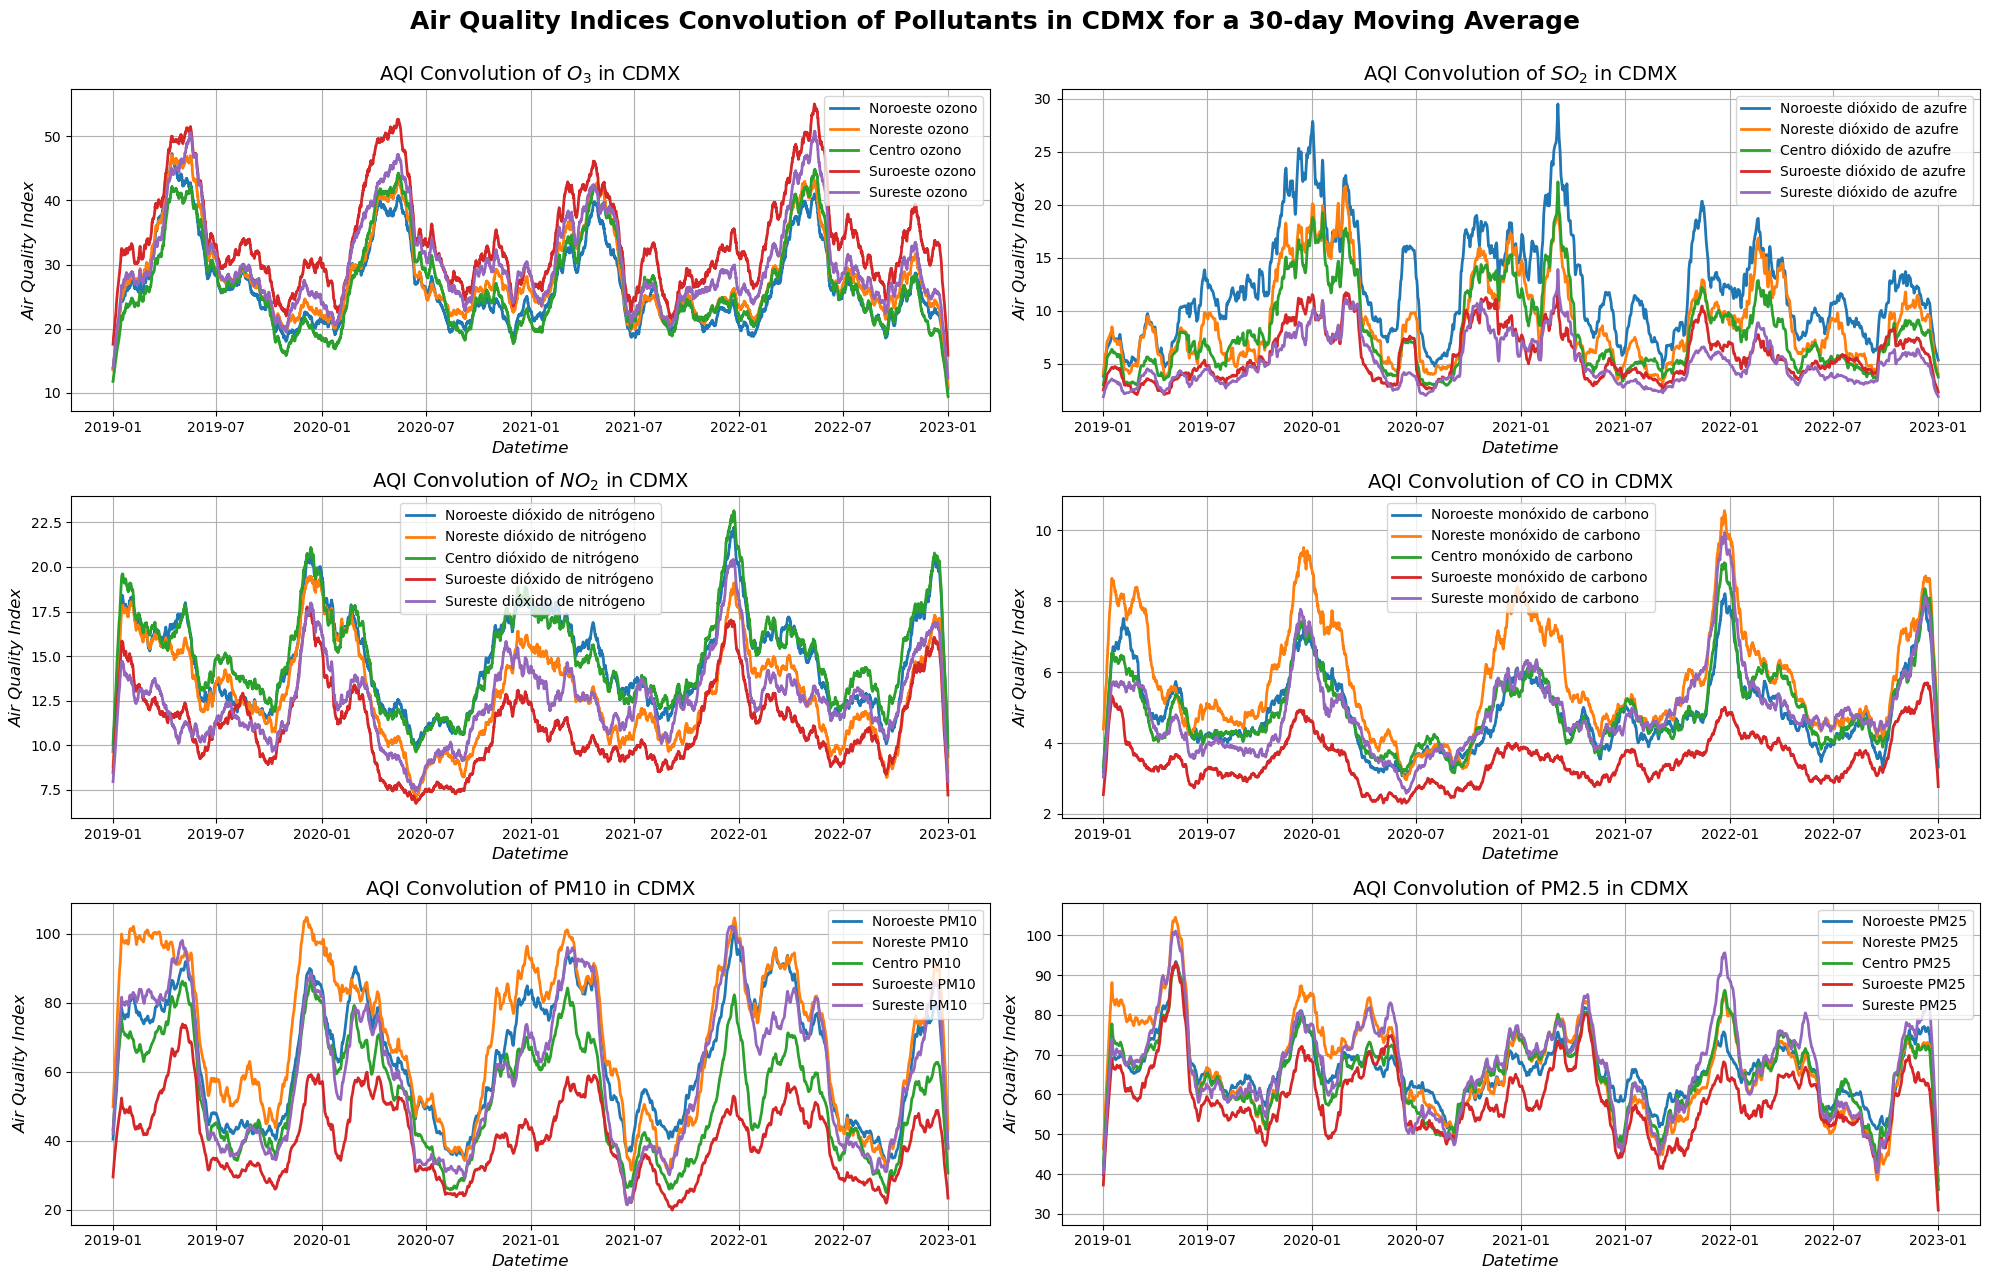

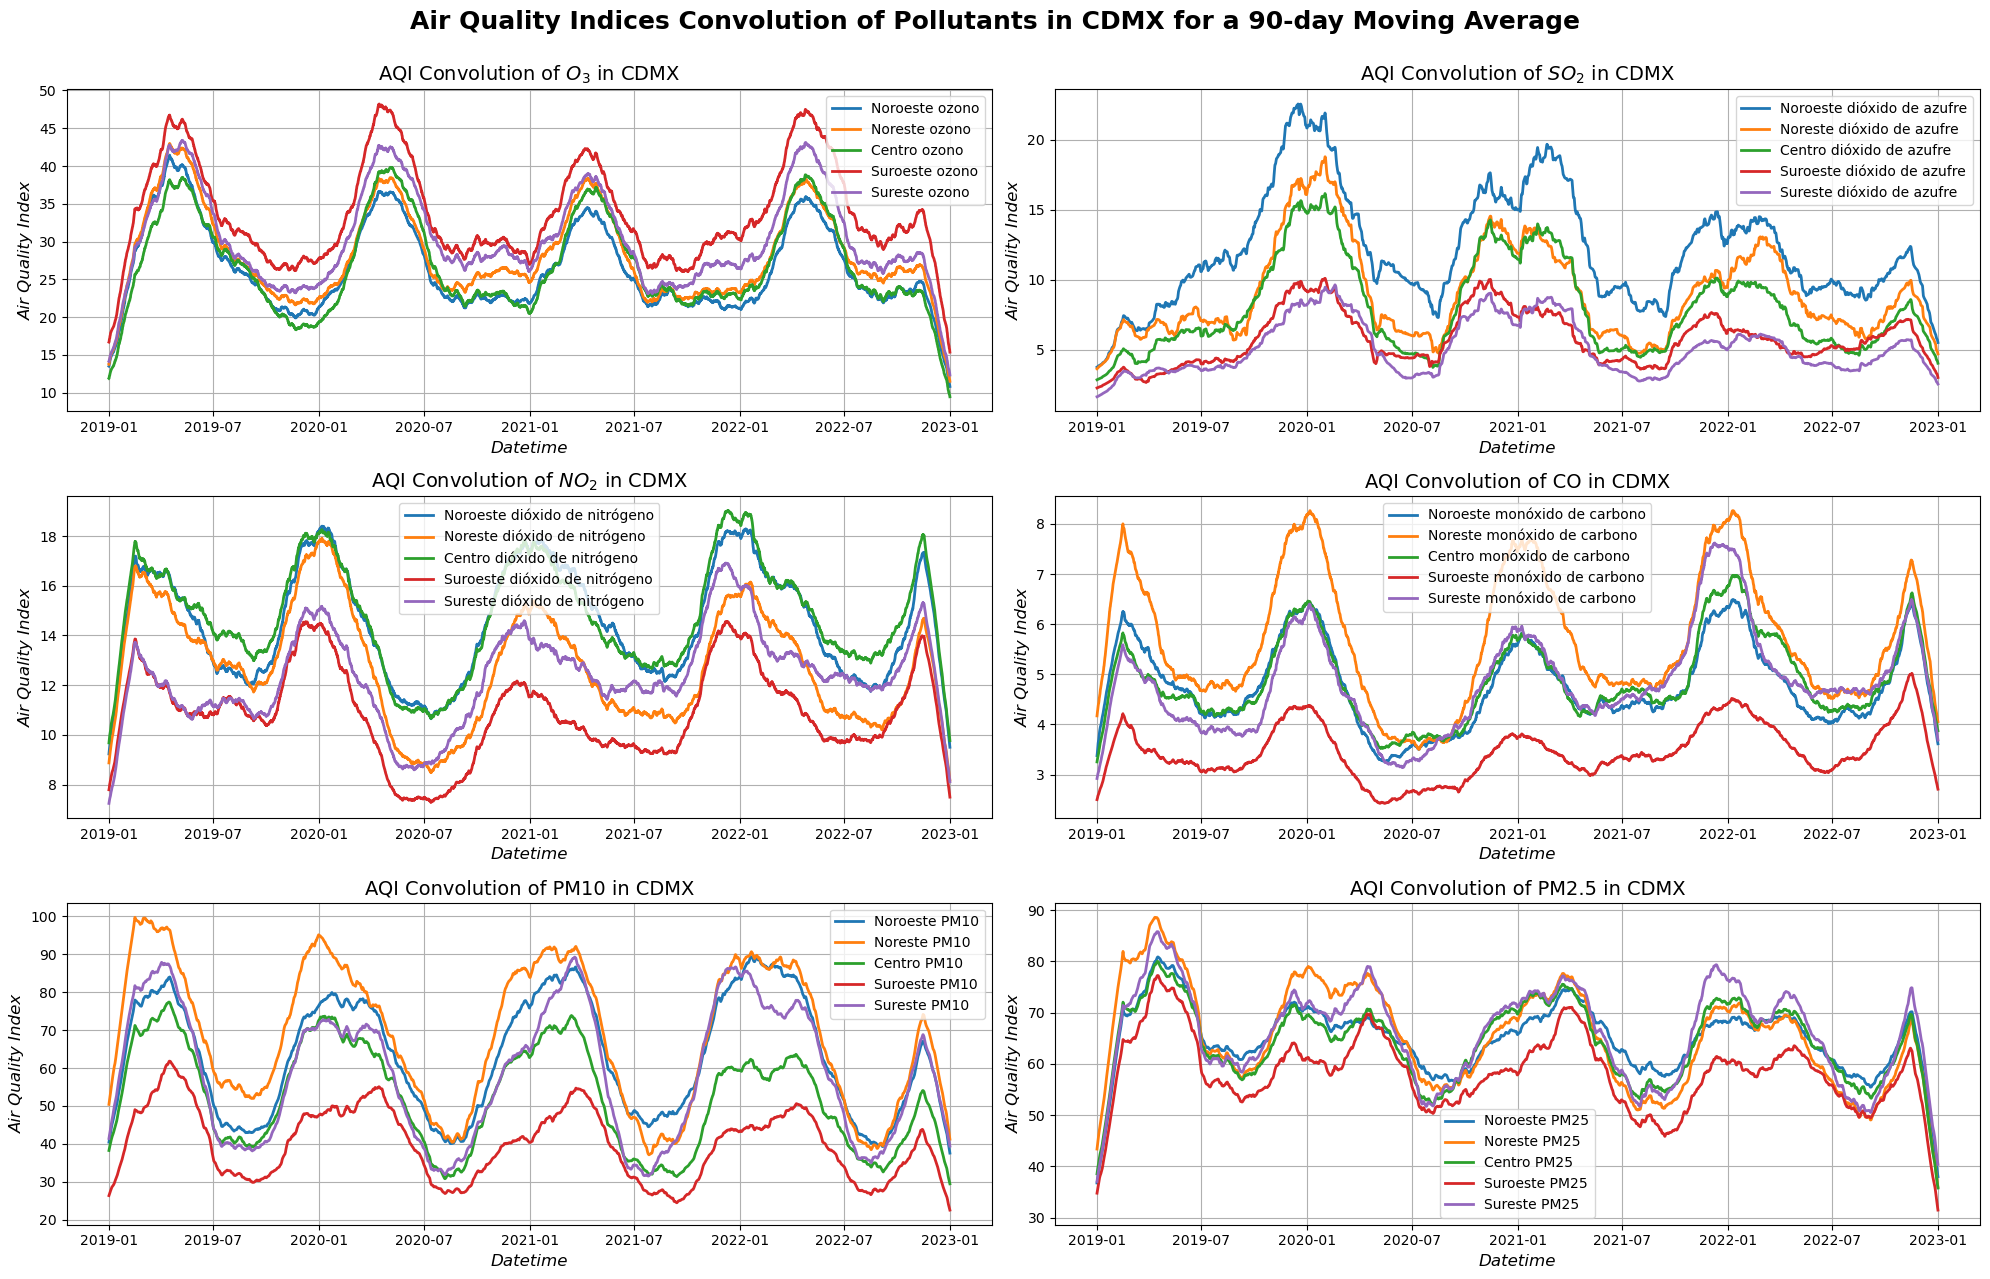

In [19]:
# Function to plot convolutions of pollutant indices using the 4D array
def plot_convolutions_from_array(data_reshaped, ma_index):
    # Create figure and axes
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 13))

    # Iterate over the axes and plot the data for each pollutant
    for i, ax in enumerate(axes.flat):
        # Iterate over each region for the current contaminant
        for j in range(5):
            # Define the region and the pollutant for the current subplot
            pollutant_data = data_reshaped[:, i, j, ma_index]
            
            # Trim the array to exclude leading and trailing NaNs
            valid_idx = ~np.isnan(pollutant_data)
            dates_trim = data['Fecha y Hora'][valid_idx]
            pollutant_trim = pollutant_data[valid_idx]
            
            # Plot the convolution result for the current region
            ax.plot(dates_trim, pollutant_trim, label=f'{zones[j]} {pollutant_labels[i]}', linewidth=2)
        
        # Set the labels and title for the current subplot
        ax.set_xlabel('Datetime', fontstyle='italic', fontsize=12)
        ax.set_ylabel('Air Quality Index', fontstyle='italic', fontsize=12)
        ax.set_title(f'AQI Convolution of {labels[i]} in CDMX', fontsize=14)
        ax.legend(loc=0)
        ax.grid(True)

    # Add a suptitle for the entire figure
    plt.suptitle(f'Air Quality Indices Convolution of Pollutants in CDMX for a {n_days[ma_index]}-day Moving Average', fontsize=18, fontweight='bold')

    # Adjust layout and show the plot
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

# Define the labels for the pollutants and zones
zones = ['Noroeste', 'Noreste', 'Centro', 'Suroeste', 'Sureste']
pollutant_labels = ['ozono', 'dióxido de azufre', 'dióxido de nitrógeno', 'monóxido de carbono', 'PM10', 'PM25']

# Iterate and plot each moving average
for ma_index in range(len(kernels)):
    plot_convolutions_from_array(data_reshaped, ma_index)